In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


In [4]:
df = df.drop(["User ID", "Gender"], axis = 1)

In [5]:
X = df.iloc[:, :-1].values

In [6]:
y = df.iloc[:, -1].values

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
sc_X = StandardScaler()

In [10]:
X = sc_X.fit_transform(X)

c:\users\jaide\anaconda3\envs\mlai\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\users\jaide\anaconda3\envs\mlai\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
classifier = KNeighborsClassifier(n_neighbors = 5, p = 2, metric = "minkowski")

In [14]:
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [15]:
classifier.score(X_test, y_test)

0.93

In [16]:
y_pred = classifier.predict(X_test)

In [17]:
from sklearn.metrics import confusion_matrix

In [18]:
cm = confusion_matrix(y_test, y_pred)

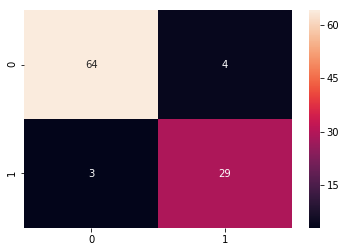

In [19]:
sns.heatmap(cm, annot = True)

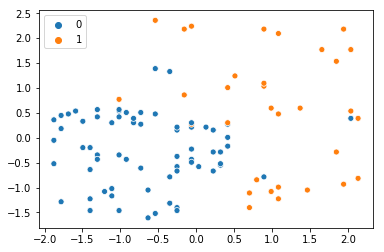

In [20]:
sns.scatterplot(X_test[:, 0], X_test[:, 1], hue = y_test)

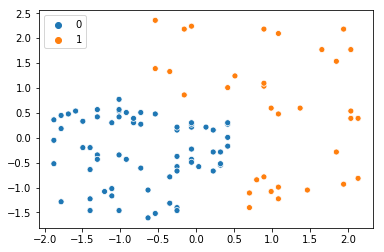

In [21]:
sns.scatterplot(X_test[:, 0], X_test[:, 1], hue = y_pred)

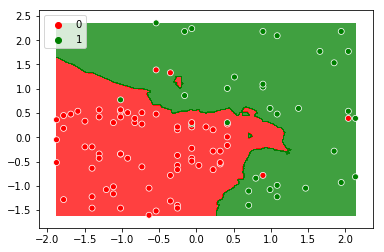

In [22]:
from matplotlib.colors import ListedColormap
X_set, Y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(X_set[:, 0].min(), X_set[:, 0].max(), 0.01),
                    np.arange(X_set[:, 1].min(), X_set[:, 1].max(), 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), 
             cmap = ListedColormap(("red", "green")), alpha = 0.75)
sns.scatterplot(X_test[:, 0], X_test[:, 1], palette = {0: "red", 1: "green"}, hue = y_test)